In [1]:
# Read thge dataset

In [3]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


###  What is the distribution of age among heart failure patients in the dataset

In [41]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [42]:
age_data = df['age']


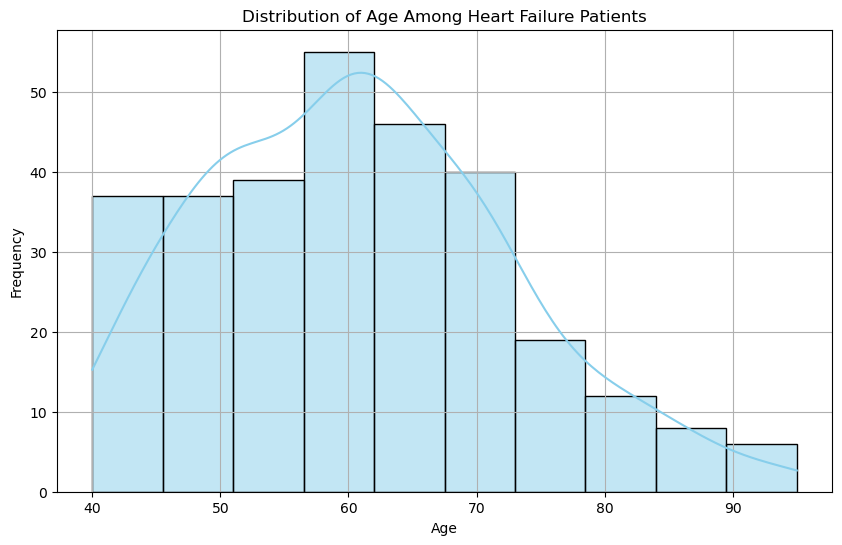

In [48]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(age_data.dropna(), kde=True, color='skyblue')
plt.title('Distribution of Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

###  2. How does the death rate vary with age

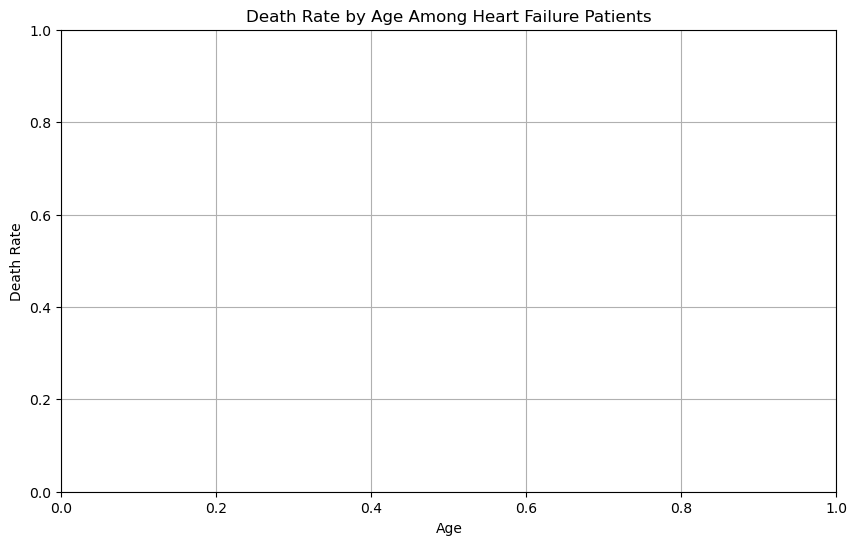

In [54]:
# Filter the data for heart failure patients
heart_failure_df = df[df['age'] == 'Yes']  


death_rate_by_age = heart_failure_df.groupby('age')['DEATH_EVENT'].mean().reset_index()

# Visualize the death rate by age
plt.figure(figsize=(10, 6))
sns.lineplot(data=death_rate_by_age, x='age', y='DEATH_EVENT', marker='o', color='skyblue')
plt.title('Death Rate by Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.grid(True)
plt.show()


### 3.What is the percentage of male and female patients in the dataset?

In [5]:

gender_percentage = df['sex'].value_counts(normalize=True) * 100

# Print the percentage of male and female patients
print("Percentage of Male and Female Patients:")
print(gender_percentage)


Percentage of Male and Female Patients:
1    64.882943
0    35.117057
Name: sex, dtype: float64


### 4. how does the platelet count vary among different  age  groups

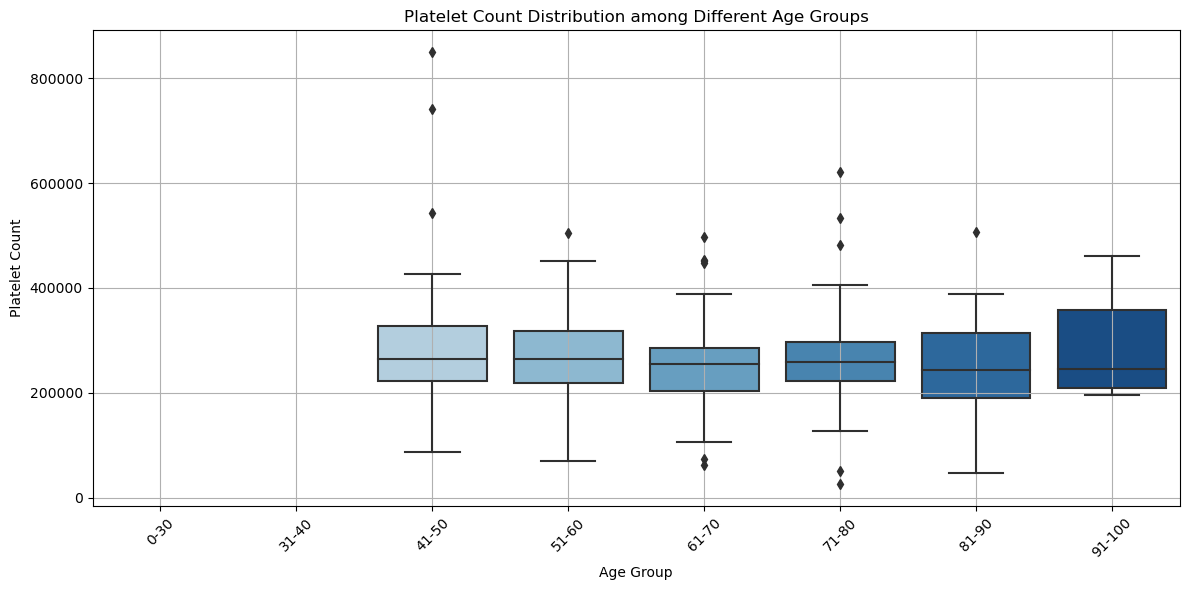

In [10]:

# Visualize platelet count distribution among different age groups
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='age', y='platelets', palette='Blues')
plt.title('Platelet Count Distribution among Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
df.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### 5.Is there a correlation between creatings and sodium levels in the blood

Missing Values:
serum_creatinine    0
serum_sodium        0
dtype: int64


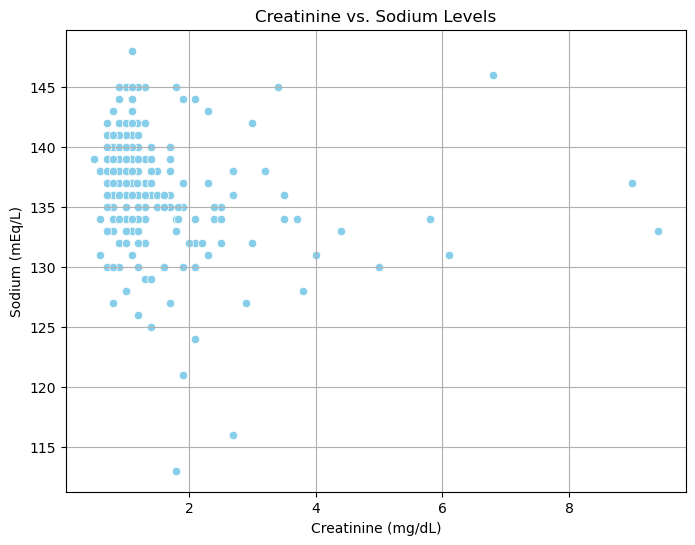

Correlation between Creatinine and Sodium levels: -0.1890952100911741


In [16]:

# Check for any missing values in creatinine and sodium columns
missing_values = df[['serum_creatinine', 'serum_sodium']].isnull().sum()
print("Missing Values:")
print(missing_values)

# Drop rows with missing values in either creatinine or sodium column
df_cleaned = df.dropna(subset=['serum_creatinine', 'serum_sodium'])

# Calculate the correlation between creatinine and sodium levels
correlation = df_cleaned['serum_creatinine'].corr(df_cleaned['serum_sodium'])

# Visualize the relationship between creatinine and sodium levels
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='serum_creatinine', y='serum_sodium', color='skyblue')
plt.title('Creatinine vs. Sodium Levels')
plt.xlabel('Creatinine (mg/dL)')
plt.ylabel('Sodium (mEq/L)')
plt.grid(True)
plt.show()

print("Correlation between Creatinine and Sodium levels:", correlation)


### 6.how does th5 prevalence of high blood pressure differ between male and female patients

In [ ]:


# Filter the data for patients with high blood pressure
high_bp_df = df[df['high_blood_pressure'] == 'Yes']  

# Calculate the prevalence of high blood pressure by gender
prevalence_by_gender = high_bp_df['sex'].value_counts(normalize=True) * 100  

# Visualize the prevalence of high blood pressure by gender
plt.figure(figsize=(6, 4))
sns.barplot(x=prevalence_by_gender.index, y=prevalence_by_gender.values, palette='pastel')
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Prevalence (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### 7.what is the relationship between smoking habits and the occurrence of heart failure



In [ ]:
# Calculate the occurrence of heart failure by smoking status
occurrence_by_smoking = df.groupby('smoking')['time'].value_counts(normalize=True).unstack() * 100

# Visualize the relationship between smoking habits and occurrence of heart failure
plt.figure(figsize=(8, 6))
sns.barplot(data=occurrence_by_smoking, x=occurrence_by_smoking.index, y='Yes', palette='pastel')
plt.title('Occurrence of Heart Failure by Smoking Habits')
plt.xlabel('Smoking Habits')
plt.ylabel('Occurrence (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### 8.Are there any noticeable patterns in the distribution of deathh events across different age groups

### 10. how does the serum creating level vary between patients who survived and those who did not?

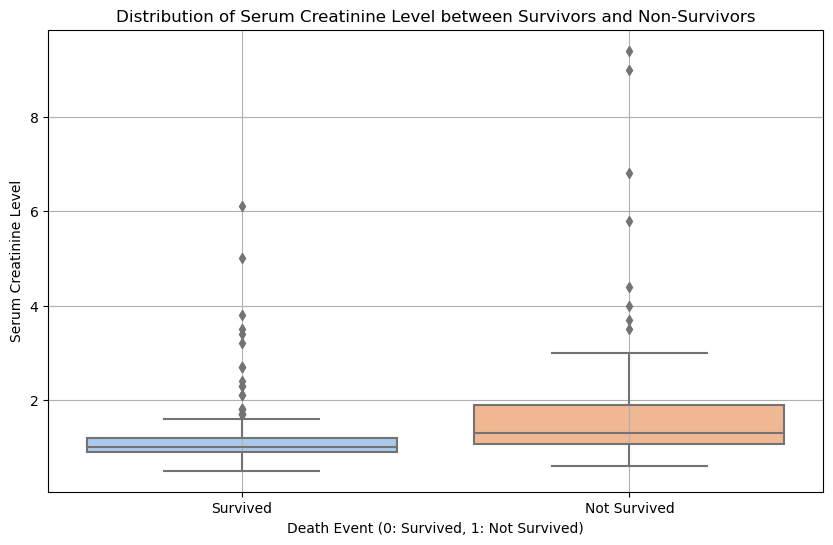

In [22]:

# Visualize the distribution of serum creatinine level between patients who survived and those who did not
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='DEATH_EVENT', y='serum_creatinine', palette='pastel')
plt.title('Distribution of Serum Creatinine Level between Survivors and Non-Survivors')
plt.xlabel('Death Event (0: Survived, 1: Not Survived)')
plt.ylabel('Serum Creatinine Level')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Not Survived'])
plt.grid(True)
plt.show()
